In [43]:
import os
import matplotlib.pyplot as plt
import random 
from PIL import Image
import numpy as np

In [2]:
dataset_path = "RGB_224x224/RGB_224x224"

In [3]:
train_dir = os.path.join(dataset_path, "train")


In [4]:
classes = os.listdir(train_dir)

In [5]:
len(classes)

139

In [6]:
classes

['Cherry plant',
 'Rice (Paddy) plant',
 'Oil palm fruit plant',
 'Papayas plant',
 'Maracuja(Passionfruit) plant',
 'Collards plant',
 'Starfruit plant',
 'Jute plant',
 'Flaxseed (Linseed) plant',
 'Mung bean plant',
 'Scallions plant',
 'Lychee plant',
 'Yams plant',
 'Vanilla beans plant',
 'Avocados plant',
 'Hemp plant',
 'Oregano plant',
 'Watermelons plant',
 'Oats plant',
 'Broccoli plant',
 'Rambutan plant',
 'Raspberries plant',
 'Cucumbers and gherkins plant',
 'Thyme plant',
 'Rubber (natural) plant',
 'Barley plant',
 'Saffron plant',
 'Hazelnuts plant',
 'Potatoes plant',
 'Cassava plant',
 'Rye plant',
 'Gooseberries plant',
 'Pineapples plant',
 'Dry beans plant',
 'Sage plant',
 'Cabbages and other brassicas plant',
 'Cocoa beans plant',
 'Okra plant',
 'Guavas plant',
 'Cinnamon plant',
 'Figs plant',
 'Hen eggs (shell weight) plant',
 'Onions (dry) plant',
 'Leeks plant',
 'Soybeans plant',
 'Rosemary plant',
 'Almonds plant',
 'Longan plant',
 'Grapes plant',
 'Mil

In [7]:
random.sample(classes, 5)

['Saffron plant',
 'Ginger plant',
 'Chickpeas plant',
 'Pomegranates plant',
 'Cherimoya plant']

In [8]:
def show_sample_images(num_classes = 5):
    fig, axes = plt.subplots(num_classes, 5, figsize = (15, 3 * num_classes))
    for i, classes_name in enumerate(random.sample(classes, num_classes)):
        class_path = os.path.join(train_dir, classes_name)
        images = os.listdir(class_path)

        for j in range(5):
            img_path = os.path.join(class_path, images[j])
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i,j].set_title(classes_name)
            axes[i,j].axis("off")
            
    plt.tight_layout()

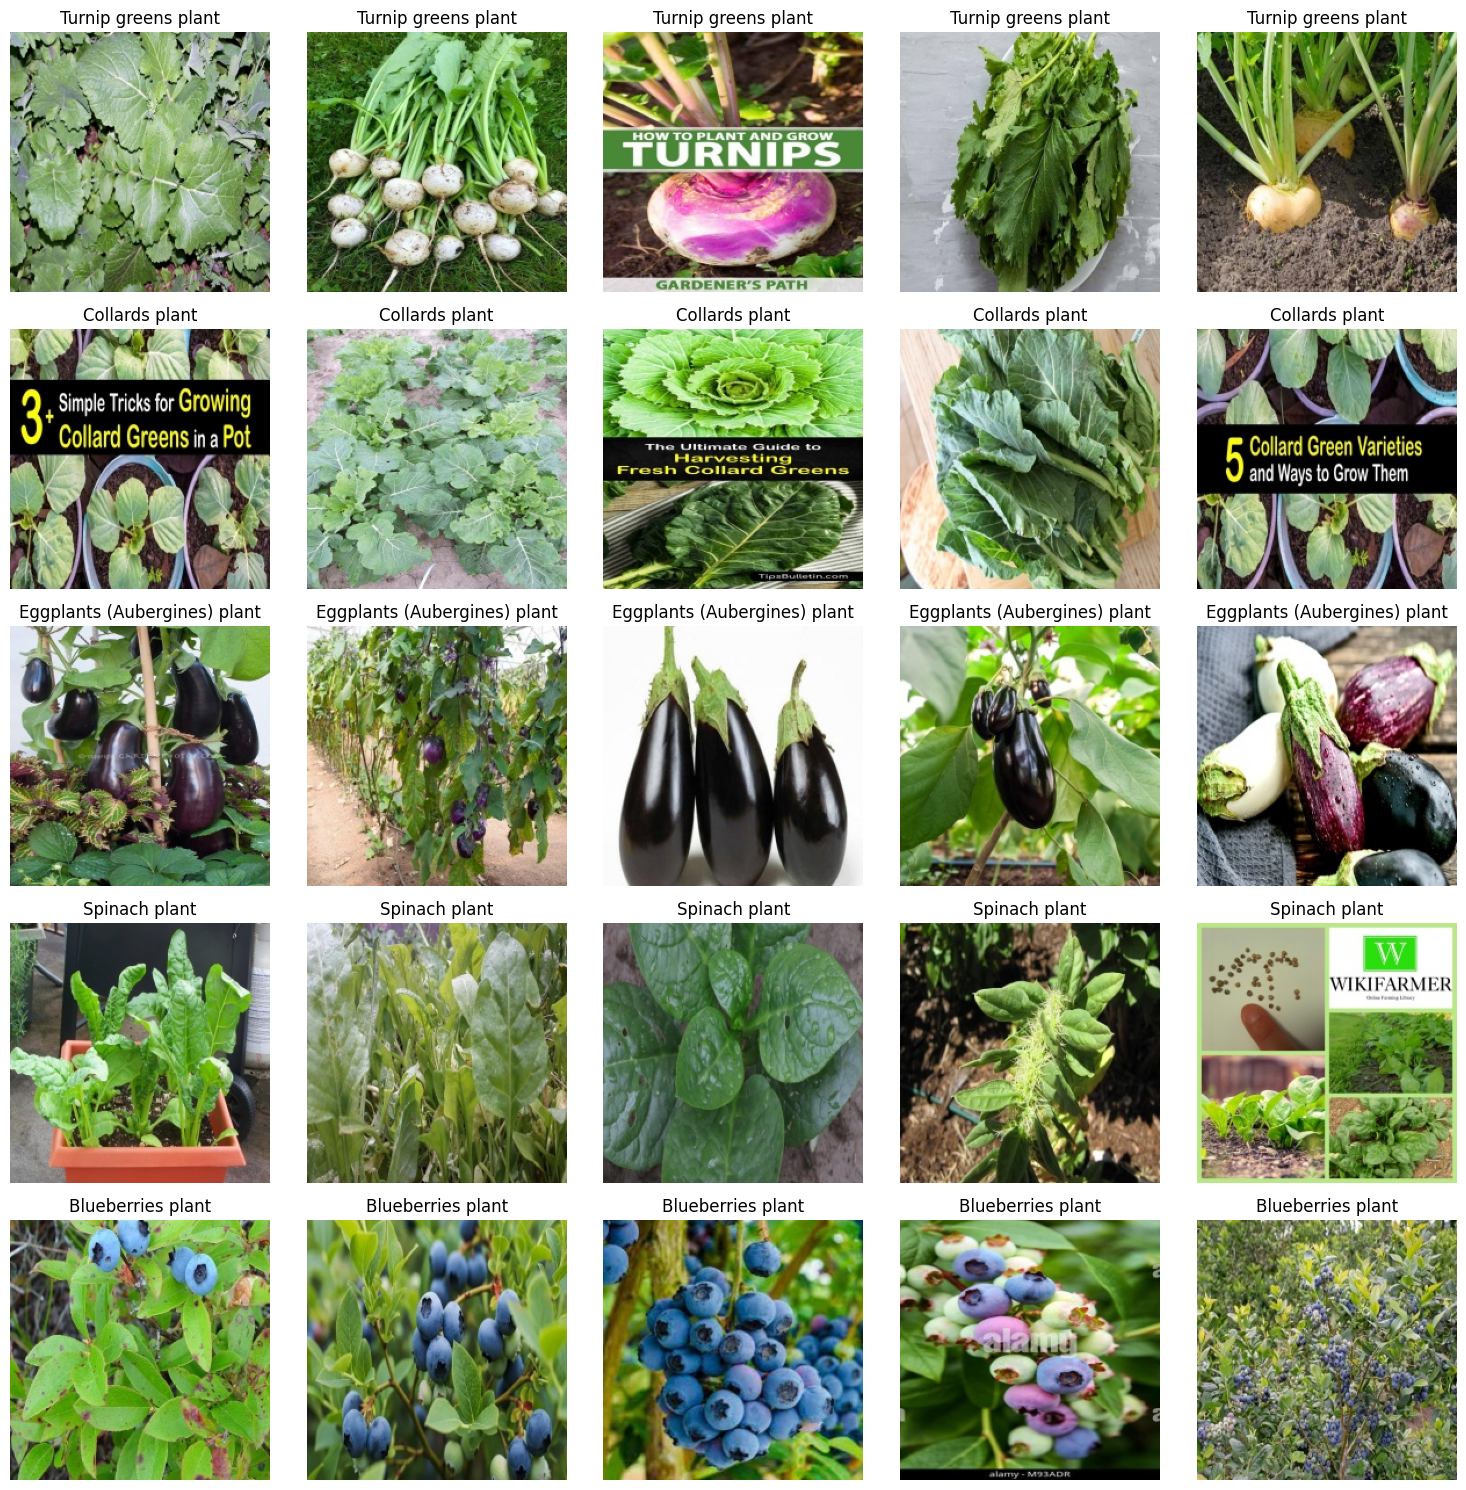

In [9]:
show_sample_images()

In [13]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


In [14]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [15]:
train_dataset = ImageFolder(os.path.join(dataset_path, 'train'), transform=transform)
val_dataset = ImageFolder(os.path.join(dataset_path, 'val'), transform=transform)
test_dataset = ImageFolder(os.path.join(dataset_path, 'test'), transform=transform)

In [17]:
train_loader = DataLoader(train_dataset, batch_size= 128, shuffle=True, num_workers=8)
val_loader = DataLoader(val_dataset, batch_size= 64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size= 64, shuffle=False)

In [18]:
import torchvision.models as models
import torch.nn as nn

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
torch.backends.mps.is_available()

False

In [21]:
device

device(type='cpu')

In [22]:
model = models.resnet18(pretrained = True)

/home/root/DataScienceProjects/DeepLearning-Image-Classification/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/root/DataScienceProjects/DeepLearning-Image-Classification/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100.0%


In [23]:
for param in model.parameters():
    param.requires_grad = False

In [24]:
num_calsses = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_calsses)
model = model.to(device)

In [25]:
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
optimizer  = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
def train_one_epoch(model, loader):
    model.train()
    running_loss = 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer .zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer .step()
        running_loss += loss.item()

    return running_loss / len(loader)

In [34]:
def evalute(model, loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total

In [36]:
epochs = 5

for epoch in range(epochs):
    train_loss = train_one_epoch(model, train_loader)
    val_acc = evalute(model, val_loader)
    print(f"Epoch {epoch + 1}, train Loss: {train_loss:.4f}, Val Accuracy: {val_acc:.4f}")

Epoch 1, train Loss: 3.9166, Val Accuracy: 0.3539
Epoch 2, train Loss: 2.9125, Val Accuracy: 0.4072
Epoch 3, train Loss: 2.5971, Val Accuracy: 0.4246
Epoch 4, train Loss: 2.4169, Val Accuracy: 0.4480
Epoch 5, train Loss: 2.2923, Val Accuracy: 0.4604


In [37]:
teste_acc = evalute(model, test_loader)

In [38]:
print(f"Test Accuracy: {teste_acc:.4f}")

Test Accuracy: 0.4433


In [41]:
def visualize_predictions(model, loader, n=5):
    model.eval()
    images_shown = 0
    class_names = train_dataset.classes

    with torch.no_grad():
         for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            labels = labels.to(device) 


            for i in range(images.size(0)):
                if images_shown >= n:
                    return

                # Denormalize the image for correct display
                img = images[i].cpu().permute(1, 2, 0).numpy()
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                img = std * img + mean
                img = np.clip(img, 0, 1)

                plt.imshow(img)
                plt.title(f"True: {class_names[labels[i]]}, Pred: {class_names[preds[i]]}")
                plt.axis("off")
                plt.show()

                images_shown += 1

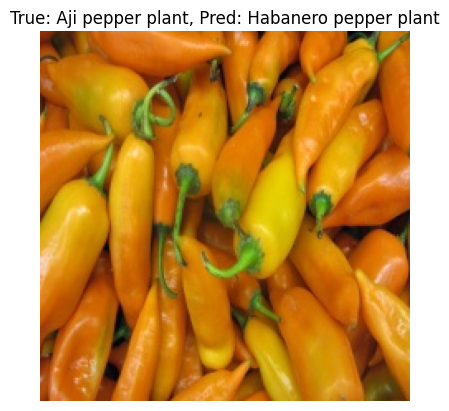

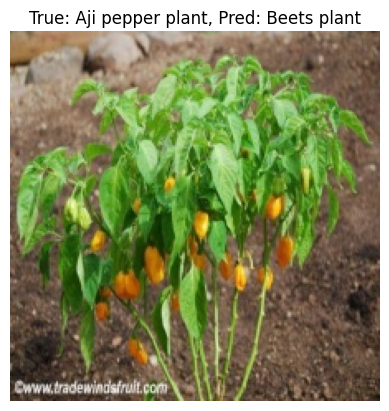

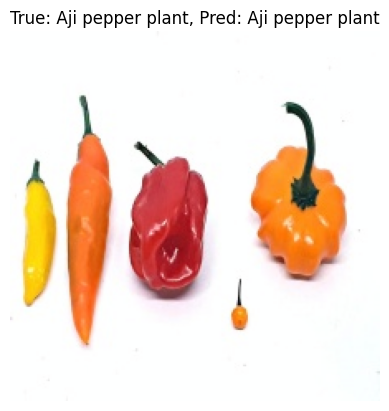

In [44]:
visualize_predictions(model, test_loader, 3)